# Sentimental Analysis: Shakespeare's Sonnets

* Name: Juliene Mae Bejosano
* Date: August 4, 2023

## Introduction

### Research Topic
This project will be a sentiment analysis of Shakespeare's sonnets.

### Motivation: 
Known for his plays, William Shakespeare entices the readers through the use of language to mimic convincing representations of reality. Instead of analyzing plays like Macbeth and Julius Ceasar, however, we will be looking at the collection of Shakespeare's Sonnets. While his sonnets mainly concern love, Shakespeare also reflects on themes such as change, time, absence, aging, and even infidelity. As words are crucial in communicating emotions and thoughts, conducting a sentiment analysis on his sonnets allows us better understand the emotional content of his collection as a whole as well as his sonnets individually. Ultimately, the purpose of this project is to gain a better understanding of the sentiments attached to the sonnets, and to analyze the overall progresssion of the sentiments throughout the text.

### Questions:
* What is the most common words?
    * Does it tend to be more negative or positive?
* Does the sentiment become more negative as the it gets further into the collection?
    * What is the sonnet with the highest score based on the number of words with a positive sentiment?
    * What is the sonnet with the highest score based on the total sentiment scores of words within each sonnet?


## Method

Main goal: Answer the questions listed above and relate findings to the main purpose.

In order to do a sentiment analysis, it would be crucial to:
1. Clean the data
2. Create a function for getting the most frequent word.
3. Create a function to get the top 10 positive and negative functions.
    * Make a horizontal bar plot to best illustrate the results. 
        * Make sure to color code to make it more understandable.
4. Overall analysis of the collection.
    * Use various splits:
        * 500 word splits to create a visual that is less impacted by the possible varrying themes of each sonnet.
        * Sonnet-by-Sonnet
            * Sentimental analysis based on the number of "positve" or "negative" words.
            * Sentimental analysis based on the compound score. 
5. How does the data compare with one another?


###  Data Information
#### Installing necesary packages for the analysis
Packages will include:
* From nltk:
    * sentiment
        * vader
    * tokenize
        * word tokenize
        * sent tokenize
    * corpus
        * stopwords
        * opinion_lexicon
    * stem.porter
        * PorterStemmer
* requests
* pandas

In [2]:
import requests
import matplotlib.pyplot as plt
import nltk

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

from string import punctuation

import pandas as pd

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


#### Importing text file for Shakespeare's Sonnets

In [3]:
sonnets_url = "https://www.gutenberg.org/cache/epub/1041/pg1041.txt"
sonnets = requests.get(sonnets_url)
sonnets_string = sonnets.text
sonnets_string = sonnets_string.lower()
sonnets_string = sonnets_string.split("*** start of the project gutenberg ebook shakespeare's sonnets ***")[1]
sonnets_string = sonnets_string.split("*** end of the project gutenberg ebook shakespeare's sonnets ***")[0]

The last two lines of code assures that the text being observed solely inclueds Shakespeare's sonnet and not licensing information associated with Project Gutenberg.

#### Cleaning up the string used for the Analysis

##### Tokenize

In [4]:
sonnets_tokens = word_tokenize(sonnets_string)

It's important to tokenize the text so that we can make sure that the sia analysis is able to take every word into consideration. The data, however, still needs to be cleaned.

##### Into Individual Sonnets

In [13]:
def divide_sonnets(sonnets_string):
    sonnets = sonnets_string.split(".\r\n\r\n")
    return sonnets
individual_sonnets = divide_sonnets(sonnets_string)
for i, sonnet in enumerate(individual_sonnets, start=1):
    print(f"Sonnet {i}:")
    lines_to_print = 2
    print('\n'.join(sonnet.strip().splitlines()[:lines_to_print]))

Sonnet 1:
the sonnets

Sonnet 2:
ii

Sonnet 3:
iii

Sonnet 4:
iv

Sonnet 5:
v

Sonnet 6:
vi

Sonnet 7:
vii

Sonnet 8:
viii

Sonnet 9:
x

Sonnet 10:
xi

Sonnet 11:
xii

Sonnet 12:
xiii

Sonnet 13:
xiv

Sonnet 14:
xvi

Sonnet 15:
xvii

Sonnet 16:
xviii

Sonnet 17:
xix

Sonnet 18:
xx

Sonnet 19:
xxi

Sonnet 20:
xxii

Sonnet 21:
xxiii

Sonnet 22:
xxiv

Sonnet 23:
xxv

Sonnet 24:
xxvi

Sonnet 25:
xxvii

Sonnet 26:
xxviii

Sonnet 27:
xxix

Sonnet 28:
xxx

Sonnet 29:
xxxi

Sonnet 30:
xxxii

Sonnet 31:
xxxiii

Sonnet 32:
xxxiv

Sonnet 33:
xxxv

Sonnet 34:
xxxvi

Sonnet 35:
xxxvii

Sonnet 36:
xxxix

Sonnet 37:
xl

Sonnet 38:
xli

Sonnet 39:
xlii

Sonnet 40:
xliii

Sonnet 41:
xliv

Sonnet 42:
xlv

Sonnet 43:
xlvi

Sonnet 44:
xlvii

Sonnet 45:
xlviii

Sonnet 46:
xlix

Sonnet 47:
l

Sonnet 48:
li

Sonnet 49:
liii

Sonnet 50:
liv

Sonnet 51:
lv

Sonnet 52:
lvi

Sonnet 53:
lvii

Sonnet 54:
lviii

Sonnet 55:
lix

Sonnet 56:
lx

Sonnet 57:
lxi

Sonnet 58:
lxii

Sonnet 59:
lxiii

Sonnet 60:
lxiv

Sonne

As mentioned before in the introduction, we would also like to do a sonnet-by-sonnet analysis. We are able to achieve this by separating the sonnets by ".\r\n\r\n".

#### Removing Stopwords and Punctuation

In [12]:
from nltk.corpus import stopwords
from string import punctuation
punctuation = list(punctuation)
punctuation.append('’')
stopwords = list(punctuation)+ stopwords.words('english')
nostop_sonnet = []
for w in sonnets_tokens:
  if w not in stopwords:
    nostop_sonnet.append(w)

#### Porter Stemmer

In [13]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

sonnets = []
for i in nostop_sonnet:
    sonnets.append(ps.stem(i))

This assures the only words being taken into cosideration in the sentiment analysis are not fluff. In addition, since we would like to see which words are used the most, it's good to remove characters that might give unwanted results. An example of an "unwanted result" would be frequency functions mistakenly counting punctuations instead of words.

## Results

### 1. Top 10 Positive and Negative Words

<Axes: title={'center': 'negative'}, ylabel='words'>

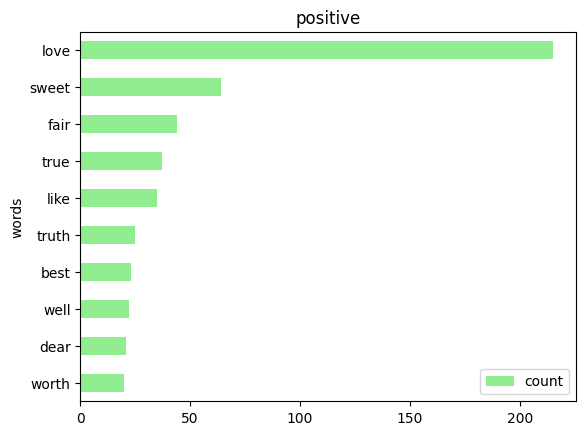

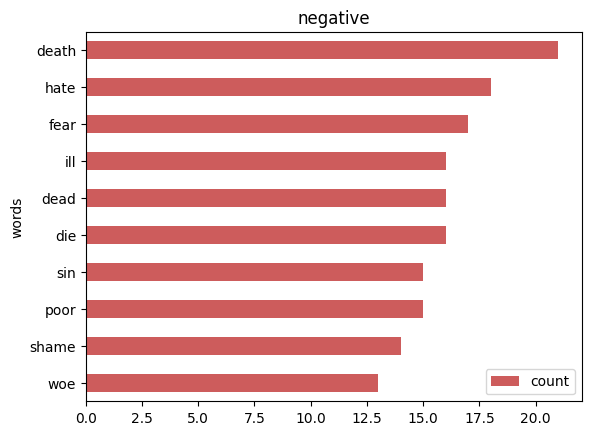

In [9]:
sia = vader.SentimentIntensityAnalyzer()

son_pos_words = list()
son_neg_words = list()

for w in sonnets:
  if sia.polarity_scores(w)['compound'] > 0:
    son_pos_words.append(w)
  if sia.polarity_scores(w)['compound'] < 0:
    son_neg_words.append(w) 

top_10_pos = nltk.FreqDist(son_pos_words).most_common(10)
dfpos = pd.DataFrame(top_10_pos, columns = ['words', 'count'])
dfpos = dfpos.sort_values(by =['count'])
dfpos.plot.barh(x= 'words' , y= 'count', title = 'positive', color = 'lightgreen')

top_10_neg = nltk.FreqDist(son_neg_words).most_common(10)
dfneg = pd.DataFrame(top_10_neg, columns = ['words', 'count'])
dfneg = dfneg.sort_values(by =['count'])
dfneg.plot.barh(x= 'words' , y= 'count', title = 'negative', color = 'indianred')



### 2. Evolution of Sentiment

#### Progression every 500 words (File Sentiment Overview)
Sentiments based on opinion_lexicon defined positive and negative. 

<Axes: >

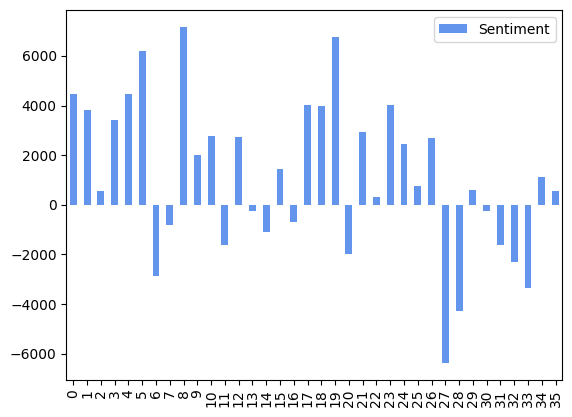

In [16]:
def splitter(n, s):
    pieces = s.split()
    return (" ".join(pieces[i:i+n]) for i in range(0, len(pieces), n))
sonnet_split = splitter(500, sonnets_string)

positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

def sentiments(sonnet_split):
    senti = 0.0
    token_ss = [w for w in word_tokenize(sonnet_split.lower()) if w not in stopwords]
    for words in token_ss:
        score = 0.0
        for i in list(token_ss):
            if i in positive_words:
                score = score + 1
            elif i in negative_words:
                score = score - 1
        senti += score
    return senti

df_son_1 = pd.DataFrame({'Sets of 500': sonnet_split})
df_son_1['Sentiment'] = [sentiments(sonnet_split) for sonnet_split in df_son_1['Sets of 500']]
df_son_1.plot(kind = 'bar', color = 'cornflowerblue')

#### Sonnet by Sonnet Sentiments
Sonnet-by-sonnet analysis based on the compound scores with the positive compound scores being represented as +1 and negative compound scores being -1. 

<Axes: >

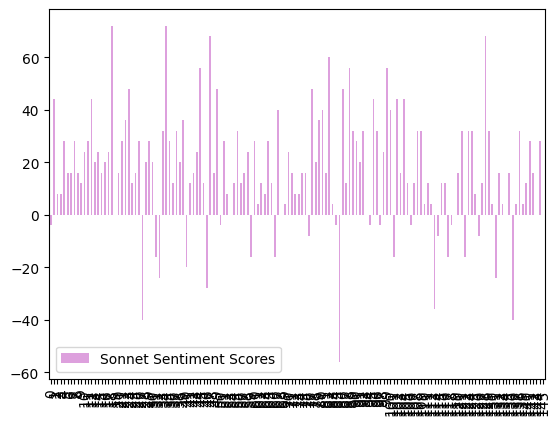

In [20]:
def son_senti(individual_sonnets):
    sonnets_senti = 0.0
    ss_token = [w for w in word_tokenize(individual_sonnets) if w not in stopwords]
    for words in ss_token:
        score = 0.0
        for i in list(sia.polarity_scores(words)):
            if sia.polarity_scores(words)['compound'] > 0:
                score = score + 1
            if sia.polarity_scores(words)['compound'] < 0:
                score = score - 1
        sonnets_senti += score
    return sonnets_senti

df_son_div = pd.DataFrame({'Sonnets': individual_sonnets})
df_son_div['Sonnet Sentiment Scores'] = [son_senti(individual_sonnets) for individual_sonnets in df_son_div['Sonnets']]
df_son_div.plot(kind = 'bar', color = 'plum')

In [24]:
sonnet_scores = [(i, son_senti(individual_sonnets)) for i, individual_sonnets in enumerate(individual_sonnets, start=1)]
highest_sentiment_sonnet = max(sonnet_scores, key=lambda x: x[1])
print(highest_sentiment_sonnet)

(19, 72.0)


From this we may conclude that Sonnet 19 has the most positive words with 72.

<Axes: >

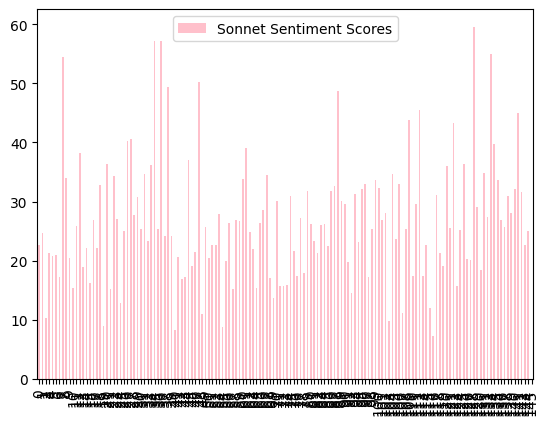

In [22]:
def sia_son_senti(individual_sonnets):
    sia_sonnets_senti = 0.0
    ss_token = [w for w in word_tokenize(individual_sonnets) if w not in stopwords]
    for words in ss_token:
        sia_score = 0.0
        for i in list(sia.polarity_scores(words)):
            if sia.polarity_scores(words)['compound'] > 0:
                sia_score = sia_score + sia.polarity_scores(words)['compound']
            if sia.polarity_scores(words)['compound'] < 0:
                sia_score = sia_score - sia.polarity_scores(words)['compound']
        sia_sonnets_senti += sia_score
    return sia_sonnets_senti

df_sia_son = pd.DataFrame({'Sonnets': individual_sonnets})
df_sia_son['Sonnet Sentiment Scores'] = [sia_son_senti(individual_sonnets) for individual_sonnets in df_sia_son['Sonnets']]
df_sia_son.plot(kind = 'bar', color = 'pink')

In [23]:
sia_sonnet_scores = [(i, sia_son_senti(individual_sonnets)) for i, individual_sonnets in enumerate(individual_sonnets, start=1)]
highest_sia_sentiment_sonnet = max(sia_sonnet_scores, key=lambda x: x[1])
print(highest_sia_sentiment_sonnet)

(129, 59.6144)


Sonnet 129 has the highest total compound score with 59.6144.

## Discussion
### Answering the Questions:
1. What is the most common words?
    * Does it tend to be more negative or positive?

The most frequent word is "thi" and according to the sentimental analysis, it is a neutral world.

The most frequent positive word is "love" while the most frequent word is "death"

Results also indicate that the use of positive words (those with compound scores greater than 1) is much more frequent. 

The barplot indicates that the word "love" was used 200+ times.
    
* Does the sentiment become more negative as the it gets further into the collection?
    * What is the sonnet with the highest score based on the number of words with a positive sentiment?
        * Sonnet 19 has the most words with positive sentiments.
    * What is the sonnet with the highest score based on the total sentiment scores of words within each sonnet?
        * Sonnet 29 has the highest total compound scores meaning that .

### Conclusion
Based on the last bar graph, the overall sentiment of the sonnets in the collection are positive. In fact, all of the total sentiments sum up to greater than 0. However, the visualizations representing the number of positive and negative words indicate 2 things:
1. There are sonnets which tend to have more negative words. These words however, have a lower impact on the overall sentiment score.
2. The most impactful word with negative sentiment is "death" and it is only used about 20 times, while the most impactful word with a positive sentiment "love" is used 200+ times. This goes to show that ultimately, love is the subject (which happens to be positive according to the Sentiment Analysis) and death, in this case, only exists as an extension.